<a href="https://colab.research.google.com/github/kafuibedzrah254/hello-world/blob/main/Customer_Churning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


# Loading and Previewing the data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Step 1: Loading and Previewing the Data
customer = pd.read_csv('/content/drive/MyDrive/AI Practice/CustomerChurn_dataset.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Explatory Data Analysis and Data cleaning for data preparation


In [5]:
for i in customer.columns:
  print(customer[i])

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object
0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0        1
1       34
2    

In [6]:
# viewing which columns of the dataset are numerical
customer.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [7]:
#Viewing the shape of our dataset
customer.shape

(7043, 21)

In [8]:

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Eliminating/Removing unwanted columns


In [10]:
null_in_each_column = customer.isnull().any()
missing_values = customer.isna()
non_empty_columns = ~customer.isnull().all()

print(non_empty_columns)
print(missing_values)
print(null_in_each_column)

customerID          True
gender              True
SeniorCitizen       True
Partner             True
Dependents          True
tenure              True
PhoneService        True
MultipleLines       True
InternetService     True
OnlineSecurity      True
OnlineBackup        True
DeviceProtection    True
TechSupport         True
StreamingTV         True
StreamingMovies     True
Contract            True
PaperlessBilling    True
PaymentMethod       True
MonthlyCharges      True
TotalCharges        True
Churn               True
dtype: bool
      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...       

In [11]:
customer.select_dtypes(include=['object','category']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

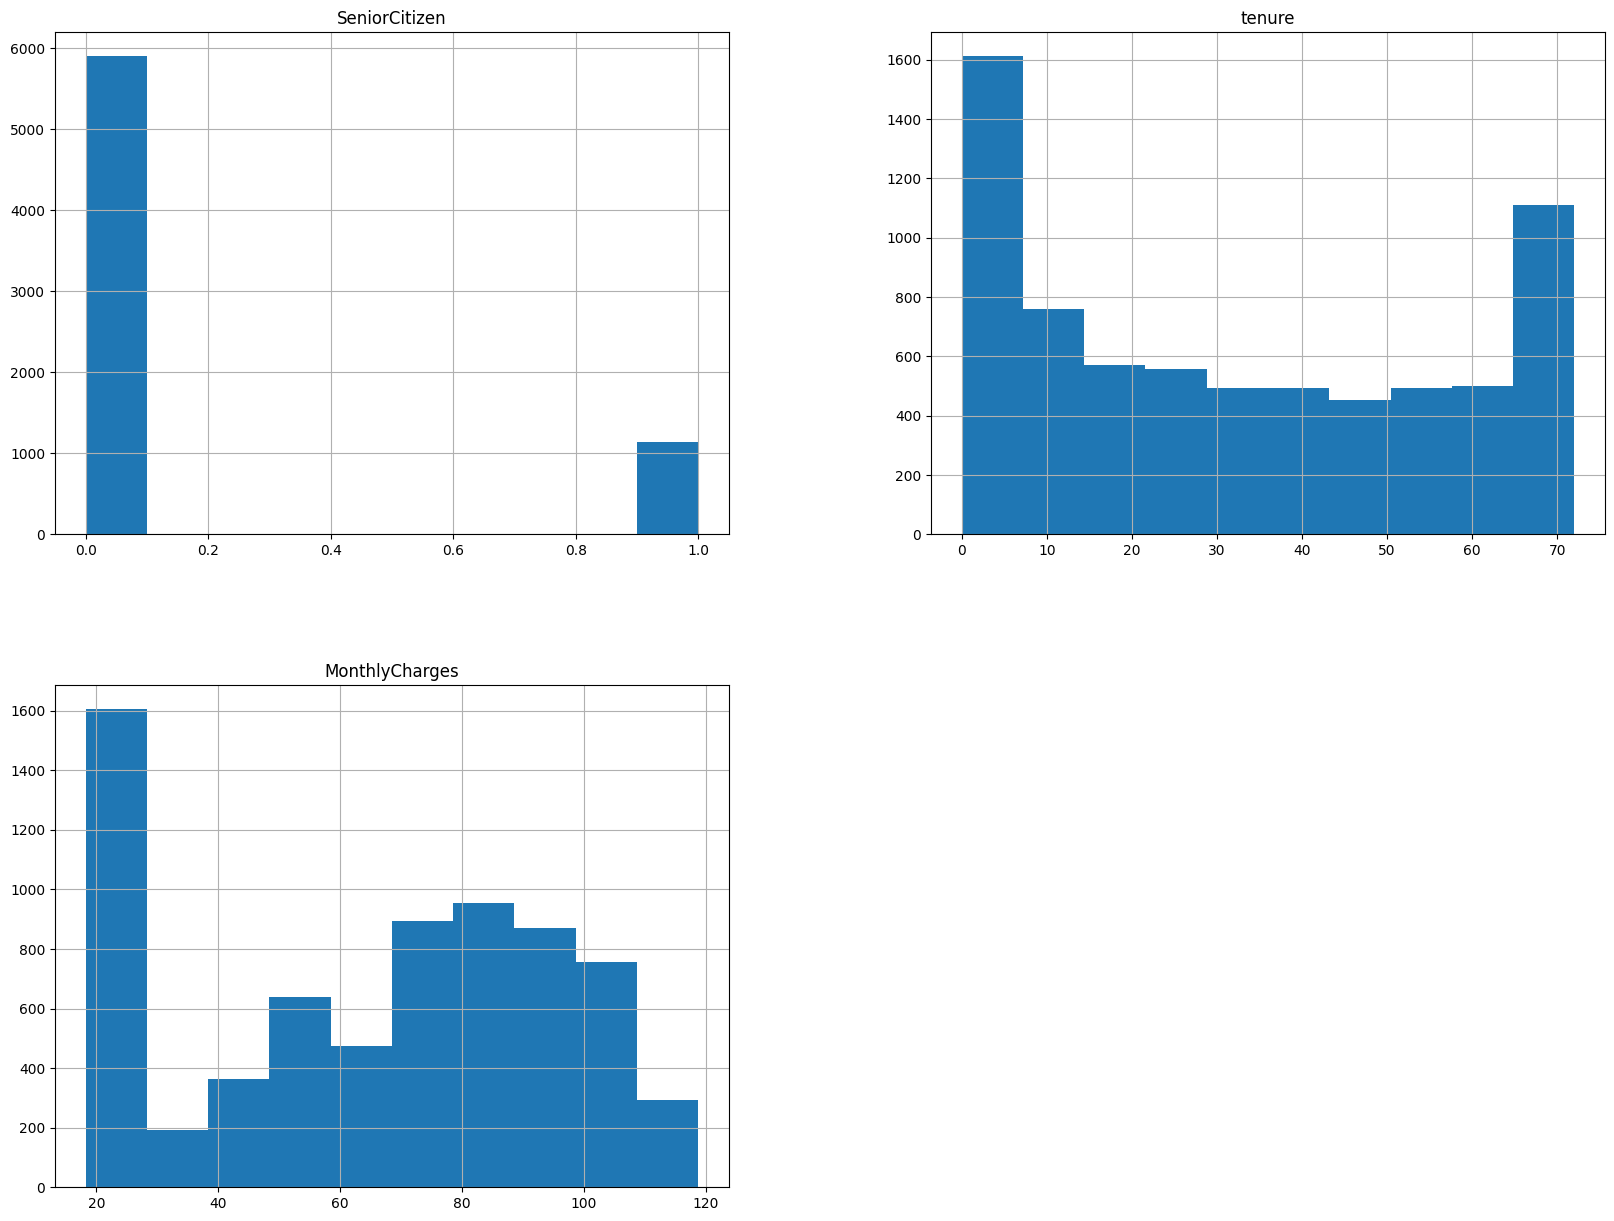

In [12]:
customer.hist(figsize=(20,15))

In [13]:
customer.describe() #only the numeric

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
#y = customer['Churn']
#X = customer.drop('Churn',axis=1)
#X


###Label encoding categorical columns and scaling numerical columns
:

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer




In [16]:
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod','Churn' ]
for column in categorical_columns:
  customer[column] = label_encoder.fit_transform(customer[column])

customer





,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


**Scaling the numerical columns**

In [17]:
scaler = StandardScaler()
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
# Replacing all empty strings with None
customer[numerical_columns] = customer[numerical_columns].replace(' ',None)
customer[numerical_columns] = customer[numerical_columns].apply(pd.to_numeric, errors='coerce')


customer=customer.fillna(customer.mean())


for num in numerical_columns:
    customer[num] = scaler.fit_transform(customer[num].values.reshape(-1, 1))

customer.drop('customerID',axis=1,inplace=True)

<ipython-input-17-d2ceedf06537>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer=customer.fillna(customer.mean())


In [18]:
X = customer.drop('Churn',axis=1)
y = customer['Churn']


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X,y)


RandomForestClassifier(random_state=42)

In [21]:
# Get feature importances
feature_importances = model.feature_importances_
feature_importances

array([0.02777739, 0.02098836, 0.02192446, 0.01950699, 0.1583921 ,
       0.00476474, 0.02261481, 0.02741146, 0.04520307, 0.02715903,
       0.0213427 , 0.04333704, 0.01738954, 0.01716562, 0.07935123,
       0.02488472, 0.05117508, 0.18133401, 0.18827766])

In [22]:
# Create a DataFrame with feature names and their importance scores
feature_importance_X = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_X = feature_importance_X.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_X)

             Feature  Importance
18      TotalCharges    0.188278
17    MonthlyCharges    0.181334
4             tenure    0.158392
14          Contract    0.079351
16     PaymentMethod    0.051175
8     OnlineSecurity    0.045203
11       TechSupport    0.043337
0             gender    0.027777
7    InternetService    0.027411
9       OnlineBackup    0.027159
15  PaperlessBilling    0.024885
6      MultipleLines    0.022615
2            Partner    0.021924
10  DeviceProtection    0.021343
1      SeniorCitizen    0.020988
3         Dependents    0.019507
12       StreamingTV    0.017390
13   StreamingMovies    0.017166
5       PhoneService    0.004765


In [23]:

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the temporary data into validation and testing
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)








In [24]:
top_15_features = feature_importance_X.head(15)['Feature'].tolist()
top_15_features

['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'Contract',
 'PaymentMethod',
 'OnlineSecurity',
 'TechSupport',
 'gender',
 'InternetService',
 'OnlineBackup',
 'PaperlessBilling',
 'MultipleLines',
 'Partner',
 'DeviceProtection',
 'SeniorCitizen']

Training the model using Keras functional API and GridSEarch for hyper parameter tuning

In [25]:
!pip install keras==2.12.0
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
#from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [26]:
def create_model(optimizer='adam', units=16, activation='relu'):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_1 = Dense(units, activation=activation)(input_layer)
    output_layer = Dense(1, activation='sigmoid')(dense_1)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define parameters for grid search
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'units': [16, 32, 64],
    'activation': ['relu', 'tanh', 'sigmoid']
}

# Use StratifiedKFold for cross-validation with binary classification
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def auc_scorer(estimator, X, y):
    y_pred = estimator.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_pred)



# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model,param_grid=param_grid, cv=cv, scoring=auc_scorer, verbose=True)
grid_result = grid_search.fit(X_train, y_train,validation_data =(X_valid,y_valid))

# Print the best parameters and accuracy
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best AUC: {grid_result.best_score_}')

# Evaluate the best model on the test set
test_accuracy = grid_result.best_estimator_.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

<ipython-input-26-e5602b5dfa83>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
59/59 [==============================] - 0s 2ms/step
Best Parameters: {'activation': 'tanh', 'optimizer': 'rmsprop', 'units': 32}
Best AUC: 0.838969787065902
Test Accuracy: 82.47%


In [27]:
# Get the best model from grid search
best_model = grid_result.best_estimator_.model

# Retrain the best model on  data
history = best_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32, verbose=True)

# Evaluate the retrained model on our test set
test_accuracy_retrained = best_model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy (Retrained Model): {test_accuracy_retrained * 100:.2f}%')

# Print validation accuracy during training
validation_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy (Retrained Model): {validation_accuracy * 100:.2f}%')


Epoch 1/50
177/177 [==============================] - 2s 5ms/step - loss: 0.4186 - accuracy: 0.8033 - val_loss: 0.4121 - val_accuracy: 0.8082
Epoch 2/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4177 - accuracy: 0.8028 - val_loss: 0.4133 - val_accuracy: 0.8068
Epoch 3/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8012 - val_loss: 0.4123 - val_accuracy: 0.8054
Epoch 4/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8009 - val_loss: 0.4110 - val_accuracy: 0.8068
Epoch 5/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.8037 - val_loss: 0.4108 - val_accuracy: 0.8054
Epoch 6/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4161 - accuracy: 0.8046 - val_loss: 0.4108 - val_accuracy: 0.8139
Epoch 7/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8033 - val_loss: 0.4100 - val_accuracy: 0.8068
Epoch 

## Saving the model and the scaler

In [29]:
from keras.models import load_model, save_model

# Assuming 'model' is your trained Keras model
best_model.save('my_model.h5')  # Save the entire model to a single file
